In [3]:
import pandas as pd 
import numpy as np 
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as  plt 


In [4]:
audio_dataset_path="Data/genres_original"
metadata=pd.read_csv("Data/features_30_sec.csv")
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
def features_extractor(file):

    audio, sample_rate =librosa.load(file_name, res_type ='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_scaled_features= np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [6]:
metadata.drop(labels=552,axis=0,inplace=True)

In [7]:
from tqdm import tqdm

extracted_features=[]

for index_num, row in tqdm(metadata.iterrows()):

    try:

        final_class_labels= row["label"]

        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))

        data=features_extractor(file_name)

        extracted_features.append([data, final_class_labels])

    except Exception as e:

        print("Error: (e)")

        continue


553it [01:31,  8.81it/s]C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_10320\4050924373.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate =librosa.load(file_name, res_type ='kaiser_fast')
c:\Users\HEMANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
556it [01:31, 11.13it/s]

Error: (e)


999it [03:08,  5.29it/s]


In [8]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()


,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [9]:
extracted_features_df['class'].value_counts()

class
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: count, dtype: int64

In [10]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df['class'].tolist())


In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

Y=to_categorical(labelencoder.fit_transform(Y)) 

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
X_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248801e+00, -1.36347127e+00, -7.22123504e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697710e+00, -3.90829611e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346827e+00, ...,
        -3.43661404e+00, -1.73870707e+00, -4.68739383e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763985e+00, -1.77685583e+00, -1.75431275e+00],
       [-2.37930965e+01,  8.29835587e+01,  2.32049227e+00, ...,
         1.40550280e+00,  4.16220367e-01, -3.45980451e-02],
       [-9.63196945e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698343e-01, -1.84749973e+00]], dtype=float32)

In [14]:
print(X_train.shape)

print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [15]:
import tensorflow as ts 
print(ts.__version__)

2.16.1


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [17]:
num_label=Y.shape[1]

In [18]:

model=Sequential()
model.add(Dense (1024, input_shape=(40,), activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (512, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (256, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (128, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (64, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (32, activation="relu"))
model.add(Dropout (0.3))
###final layer
model.add(Dense (num_label, activation="softmax"))

c:\Users\HEMANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy' ], optimizer='adam')


In [28]:
import time
t=time.localtime()
current_time = time.strftime("%Y%m%d_%H%M%S")


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.keras', verbose=1, save_best_only=True)

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data= (X_test, Y_test), callbacks = [checkpointer])
duration=datetime.now() - start
print("Training completed in",duration)

Epoch 1/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1576 - loss: 2.3014
Epoch 1: val_loss improved from inf to 2.17327, saving model to saved_models/audio_classification_20240319_052806.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1562 - loss: 2.3047 - val_accuracy: 0.2700 - val_loss: 2.1733
Epoch 2/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1720 - loss: 2.2107
Epoch 2: val_loss improved from 2.17327 to 2.11103, saving model to saved_models/audio_classification_20240319_052806.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1706 - loss: 2.2164 - val_accuracy: 0.2550 - val_loss: 2.1110
Epoch 3/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1949 - loss: 2.2285
Epoch 3: val_loss did not improve from 2.11103
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1946 - loss: 2.2281 - val_accuracy: 0.3200 - val_loss: 2.1458
Epoch 4/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2110 - loss: 2.2148
Epoch 4: val_loss

In [30]:
model.evaluate(X_test,Y_test,verbose=0)[1]

0.5950000286102295

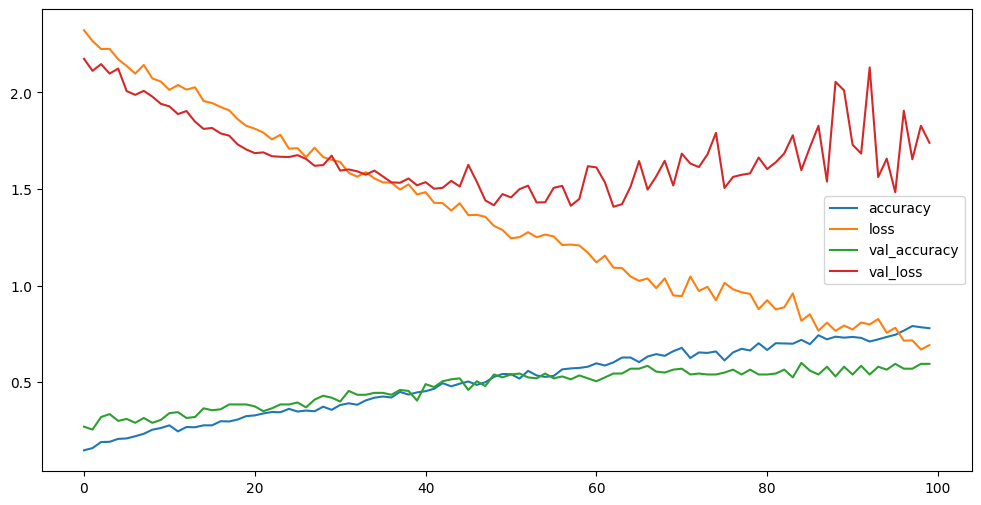

In [31]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [32]:
model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[3.79428566e-01, 8.81239976e-05, 3.22510540e-01, ...,
        6.87965730e-05, 2.93229297e-02, 2.25885794e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.49644481e-28, 0.00000000e+00],
       [9.99997377e-01, 6.73709253e-30, 1.49618404e-06, ...,
        1.18273469e-37, 2.57440740e-14, 1.03728212e-06],
       ...,
       [2.69787580e-01, 6.41777297e-04, 3.57760817e-01, ...,
        1.02268485e-03, 8.14360455e-02, 1.90106243e-01],
       [1.04195841e-01, 9.18181706e-03, 3.44742388e-01, ...,
        1.49184475e-02, 1.46144062e-01, 1.11212276e-01],
       [3.86806466e-02, 1.46288484e-01, 1.19329751e-01, ...,
        6.08613566e-02, 7.97613040e-02, 8.17011520e-02]], dtype=float32)

In [35]:
filename="Data/genres_original/blues/blues.00000.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
print(mfccs_features)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=model.predict(mfccs_scaled_features)
classes_x=np.argmax(predicted_label,axis=1)

print(classes_x)
prediction_class=labelencoder.inverse_transform(classes_x)
prediction_class

[[-240.63542    -211.21436    -193.90889    ... -109.999146
   -86.81442     -84.073586  ]
 [  99.64764     101.04283     102.243965   ...  150.07935
   138.94867     138.30977   ]
 [  -7.4032764    -8.358526      1.9154344  ...  -50.795135
   -36.53614     -28.136356  ]
 ...
 [   5.435922      2.5820096    -3.0628583  ...   -1.48644
    -5.37206      -1.4188313 ]
 [  -2.8149166    -1.455927     -4.7168193  ...   -4.0767612
    -5.0827265     0.36488536]
 [   4.298104      1.7945137    -1.658144   ...    2.920167
    -1.2879096    -2.5673504 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0]


array(['blues'], dtype='<U9')